In [1]:
!pip uninstall -y numpy
!pip install numpy==1.26.4 --no-cache-dir --force-reinstall
import numpy; print(numpy.__version__)


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Obtaining dependency information for numpy==1.26.4 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 1.7 MB/s eta 0:00:10
   ---------------------------------------- 0.1/15.8 MB 1.7 MB/s eta 0:00:10
    --------------------------------------- 0.2/15.8 MB 2.1 MB/s eta 0:00:08
    --------------------------------------- 0.4/15.8 MB 2.1 MB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
!pip uninstall -y tensorflow tensorflow-intel tensorflow-gpu keras keras-nightly keras-preprocessing


In [3]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"


In [4]:
import pandas as pd

# טוען את הקובץ
df = pd.read_csv("C:/Users/97250/Desktop/shahar/3year/semb/nlp/merged_dataset.csv")

C:\Users\97250\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# בודק כמה שורות יש לפני הניקוי
print("Before cleaning:", df.shape)

# מסיר שורות שבהן העמודה 'statement' ריקה
df = df.dropna(subset=['statement'])

# מאפס את האינדקס (לא חובה, אבל מסודר יותר)
df = df.reset_index(drop=True)

# בודק כמה שורות נשארו
print("After cleaning:", df.shape)


Before cleaning: (56794, 2)
After cleaning: (56432, 2)


In [6]:
print("Before removing duplicates:", df.shape)

Before removing duplicates: (56432, 2)


In [7]:
df = df.drop_duplicates(subset='statement')
print("After removing duplicates:", df.shape)

After removing duplicates: (54824, 2)


In [8]:
import re
#האם יש תווים מוזרים
sample_with_symbols = df[df['statement'].str.contains(r'[^\w\s]', regex=True)]
print("Rows with special characters or punctuation:", sample_with_symbols.shape[0])


Rows with special characters or punctuation: 44641


In [9]:
#האם יש קישורים
sample_with_links = df[df['statement'].str.contains(r'http\S+|www\.', regex=True, na=False)]
print("Rows with URLs:", sample_with_links.shape[0])


Rows with URLs: 688


In [10]:
#האם יש אותיות גדולות
uppercase_count = df['statement'].apply(lambda x: any(c.isupper() for c in str(x))).sum()
print("Rows with uppercase letters:", uppercase_count)


Rows with uppercase letters: 41041


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # מוסיף תמיכה בשורשים מתקדמים

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97250\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97250\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\97250\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
#האם יש מילות עצירה כמו לדוגמא ועוד
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

contains_stopwords = df['statement'].apply(lambda x: any(word in stop_words for word in str(x).lower().split()))
print("Rows containing stopwords:", contains_stopwords.sum())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97250\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Rows containing stopwords: 53184


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

examples = ["running", "better", "studies", "went"]
print("Lemmatized examples:", [lemmatizer.lemmatize(w) for w in examples])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\97250\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized examples: ['running', 'better', 'study', 'went']


In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# הגדרות ראשוניות
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # המרה לאותיות קטנות
    text = text.lower()
    
    # הסרת קישורים
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    
    # הסרת תווים לא אנגליים/אמוג'ים
    text = text.encode('ascii', 'ignore').decode('utf-8')
    
    # הסרת סימני פיסוק
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # חלוקה למילים
    words = text.split()
    
    # הסרת stopwords ולממטיזציה
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)


In [15]:
df['clean_text'] = df['statement'].apply(clean_text)

In [16]:
print("Original:", df['statement'].iloc[0])
print("Cleaned :", df['clean_text'].iloc[0])


Original: oh my gosh
Cleaned : oh gosh


In [17]:
# שמירת רק clean_text והסטטוס לקובץ חדש
df[['clean_text', 'status']].to_csv("cleaned_data_readyy.csv", index=False)


In [18]:
df[['clean_text', 'status']].to_csv(r"C:/Users/97250/Desktop/shahar/3year/semb/nlp/cleaned_data_readyy.csv", index=False)


In [19]:
import pandas as pd

df_cleaned = pd.read_csv(r"C:/Users/97250/Desktop/shahar/3year/semb/nlp/cleaned_data_readyy.csv")

In [20]:
# הסרת שורות שבהן הטקסט הנקי (clean_text) ריק או חסר
df_cleaned = df_cleaned.dropna(subset=['clean_text']).reset_index(drop=True)

# בדיקה כמה שורות נשארו
print("Total rows after cleaning:", df_cleaned.shape[0])


Total rows after cleaning: 54747


בשלב הזה ניקינו את טקסטי הגולשים מהדאטה שאיחדנו. התחלנו מ־56,794 שורות, ומתוכן הסרנו שורות ריקות או כפולות, כאלה שהטקסט בהן לא קיים או חזר על עצמו בדיוק. בהמשך, יישמנו תהליך ניקוי שכלל הורדה לאותיות קטנות, הסרת קישורים, סימני פיסוק, תווים מיוחדים ומילים חסרות ערך כמו "the", "and" וכו'. בנוסף, החזרנו כל מילה לצורת השורש שלה (למשל: studies → study). אחרי כל השלבים האלה נשארנו עם כ־54,747 טקסטים נקיים ומוכנים לעיבוד, עם שתי עמודות עיקריות: clean_text שמכילה את הטקסט הנקי, ו־status שמייצגת את הסיווג הרגשי של כל טקסט.



At this stage, we cleaned the user-generated texts from the merged dataset. We started with 56,794 rows and removed empty or duplicate entries — those with missing or identical text. Then, we applied a series of preprocessing steps: converting all text to lowercase, removing links, punctuation, special characters, and common stopwords like "the" or "and". We also applied lemmatization to reduce words to their base form (e.g., *studies* → *study*). After all these steps, we ended up with approximately 54,747 clean and ready-to-use entries, with two main columns: `clean_text` for the processed text, and `status` for the emotional label assigned to each entry.



In [21]:
import pandas as pd

# קריאת הקובץ
df = pd.read_csv("cleaned_data_readyy.csv")

# שינוי התוויות
df['status'] = df['status'].replace({
    'moderately depressed': 'Depression',
    'not depressed': 'Normal'
})

# שמירה לקובץ חדש
df.to_csv("final_data_.csv", index=False)

# הדפסת התוויות הקיימות לוודא שהכל תקין
print("✅ Labels after replacement:")
print(df['status'].value_counts())
print("\nUnique labels:", df['status'].unique())


✅ Labels after replacement:
status
Depression              18188
Normal                  16689
Suicidal                10641
Anxiety                  3617
Bipolar                  2501
Stress                   2293
Personality disorder      895
Name: count, dtype: int64

Unique labels: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [22]:
!pip install numpy==1.26.4 --force-reinstall


  Obtaining dependency information for numpy==1.26.4 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\97250\\anaconda3\\Lib\\site-packages\\~9mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



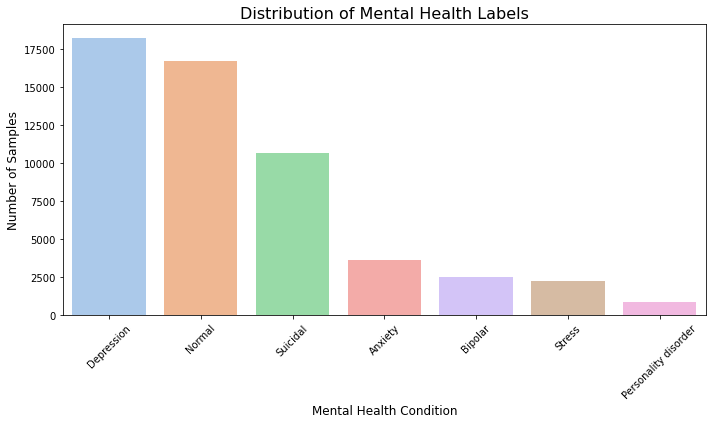

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# ספירת דוגמאות לכל קטגוריה
status_counts = df['status'].value_counts()

# ציור גרף עמודות
plt.figure(figsize=(10,6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="pastel")
plt.title("Distribution of Mental Health Labels", fontsize=16)
plt.xlabel("Mental Health Condition", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


מסקנות מהתפלגות התוויות בנתנונים
בגרף הזה אנחנו רואים את ההתפלגות של הקטגוריות בסט הנתונים אחרי שלב הניקוי. אפשר לשים לב שיש הבדל משמעותי בין הקבוצות – למשל, יש הרבה יותר דוגמאות שמסווגות כ־Depression או Normal, לעומת קטגוריות כמו Stress, Bipolar או Personality Disorder שמופיעות הרבה פחות.
זה יוצר חוסר איזון בדאטה – מה שנקרא class imbalance – וזה יכול להשפיע על איך המודל שלנו לומד. כלומר, המודל עלול "להעדיף" את הקטגוריות הנפוצות ולפחות לדייק בזיהוי של הקטגוריות החלשות.
בהמשך נצטרך לחשוב איך להתמודד עם זה – אם זה בעזרת איזון של הדאטה (למשל oversampling) או בבחירה של מודלים שיודעים להתמודד עם חוסר איזון, כמו שימוש ב־class_weight='balanced' בלמידת המודל.

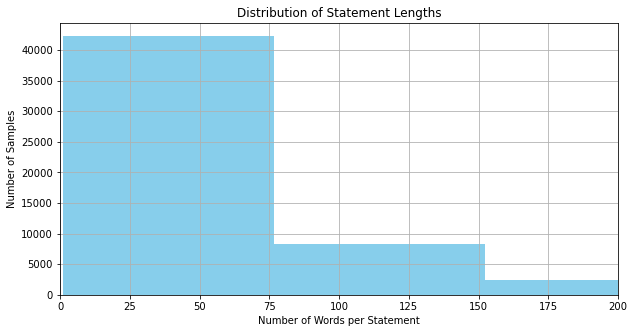

In [24]:
# הוספת עמודת ספירת מילים
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

# גרף התפלגות
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df['word_count'].hist(bins=50, color='skyblue')
plt.title("Distribution of Statement Lengths")
plt.xlabel("Number of Words per Statement")
plt.ylabel("Number of Samples")
plt.xlim(0, 200)  # מציג רק את טווח 0–200 מילים
plt.show()


בהסתכלות על גרף התפלגות אורכי המשפטים, אפשר לראות שרוב הטקסטים שבדאטה שלנו הם די קצרים – הרוב המוחלט מכיל פחות מ־75 מילים, ורק מעט טקסטים מגיעים לאורך של מעל 100 מילים.
זו תובנה חשובה, כי כשנרצה לבחור ייצוגים לטקסט או להפעיל מודלים מתקדמים כמו BERT, נצטרך לקחת בחשבון שהטקסטים שלנו הם יחסית קצרים.
מצד אחד, זה מקל על העיבוד. מצד שני, זה אומר שהרבה מאוד מידע רגשי צריך לבוא לידי ביטוי במשפטים קצרים – ולכן חשוב שהייצוג שנבחר (למשל TF-IDF או embedding) יצליח ללכוד את המשמעות גם כשהטקסט מינימלי.

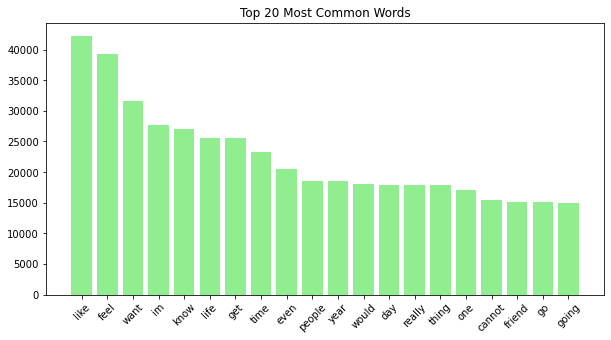

In [25]:
from collections import Counter

# הסרת ערכים חסרים והמרת כל הערכים לטקסט
texts = df['clean_text'].dropna().astype(str)

# איחוד כל הטקסטים
all_words = ' '.join(texts).split()

# ספירת מילים
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# גרף
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='lightgreen')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.show()


בגרף הזה רואים את 20 המילים שהופיעו הכי הרבה בכל הטקסטים שלנו – אחרי שניקינו אותן ממילים ריקות ופעולות מיותרות.
כצפוי, מופיעות כאן מילים כלליות כמו "like", "feel", "know", "want" – שמבטאות מצבים רגשיים או רצונות, ועוזרות לנו להבין את הסגנון שבו אנשים מדברים על התחושות שלהם.
החשיבות של הגרף הזה היא בכך שהוא נותן הצצה ראשונית לאופי הדאטה – הוא מראה לנו באילו מילים המודלים שלנו עשויים להיתקל הכי הרבה, ומהו אוצר המילים המרכזי שנצטרך להתחשב בו בהמשך.

## הצגת המילים הנפוצות מתוך כל קטגוריה

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_top_words_by_label(df, label, top_n=20):
    """
    מציג גרף של המילים הנפוצות ביותר בטקסטים לפי תווית ספציפית.

    Parameters:
    - df: DataFrame עם עמודות 'clean_text' ו־'status'
    - label: שם התווית לניתוח
    - top_n: מספר המילים הנפוצות להצגה
    """
    subset = df[df['status'] == label]

    if subset.empty:
        print(f"❗️אין שורות עם התווית '{label}'")
        return

    texts = subset['clean_text'].dropna().astype(str)
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(top_n)

    if not common_words:
        print(f"❗️לא נמצאו מילים עבור התווית '{label}'")
        return

    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='salmon')
    plt.title(f"Top {top_n} Words in '{label}' Statements")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


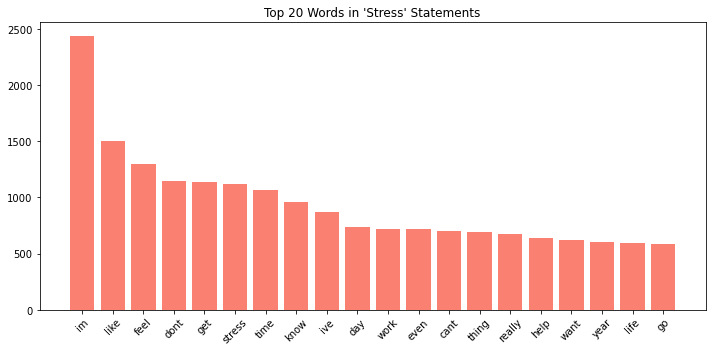

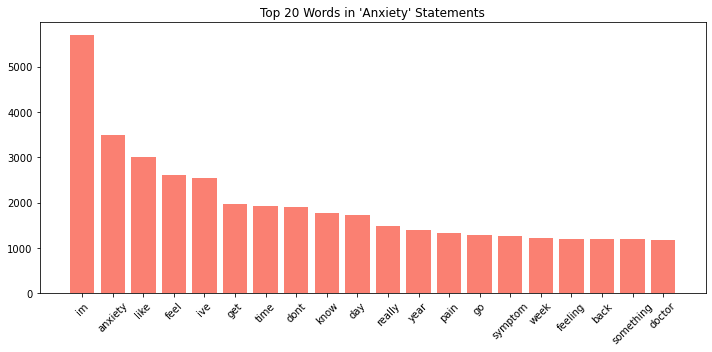

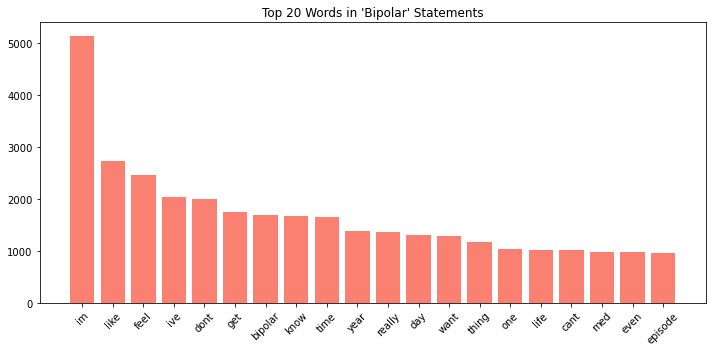

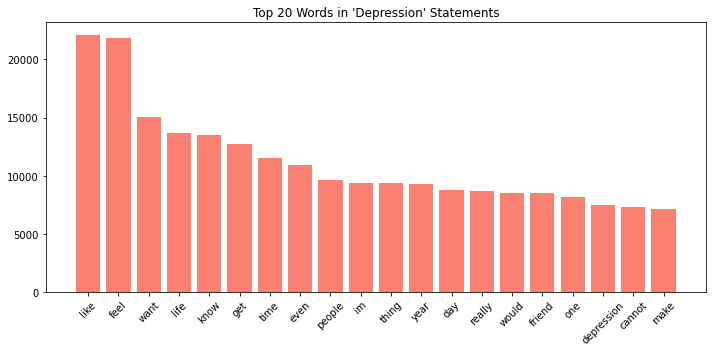

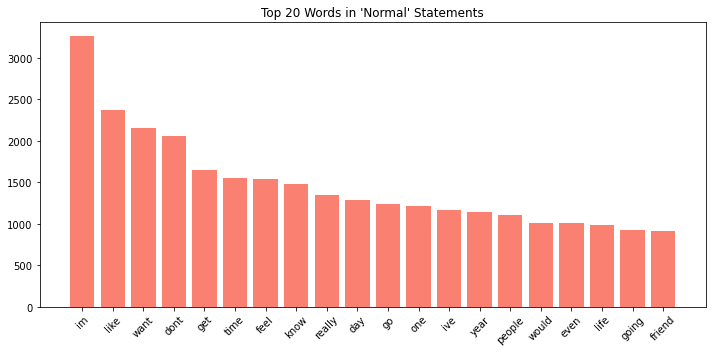

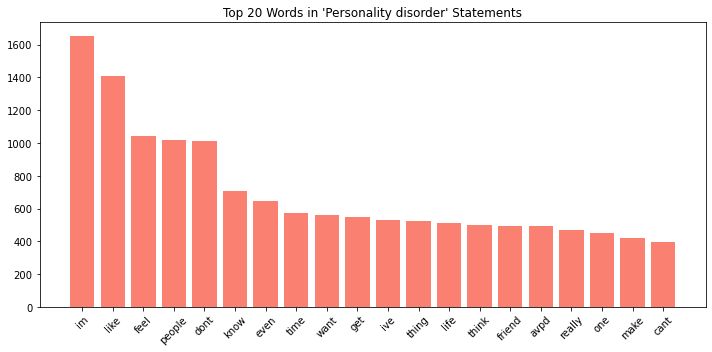

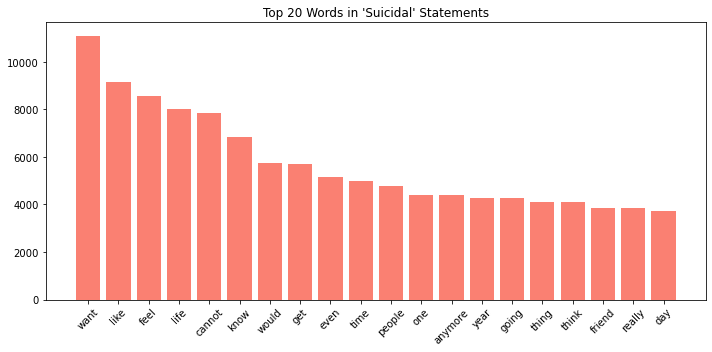

In [27]:
plot_top_words_by_label(df, "Stress")

plot_top_words_by_label(df, "Anxiety")

plot_top_words_by_label(df, "Bipolar")

plot_top_words_by_label(df, "Depression")

plot_top_words_by_label(df, "Normal")

plot_top_words_by_label(df, "Personality disorder")

plot_top_words_by_label(df, "Suicidal")

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# הסרת שורות עם clean_text חסר
df = df.dropna(subset=['clean_text'])

# נבנה את הוקטורייזר ונגביל ל-3000 מילים חשובות כדי לשמור על ביצועים טובים
tfidf = TfidfVectorizer(max_features=3000)

# יצירת מטריצת TF-IDF
tfidf_matrix = tfidf.fit_transform(df['clean_text'].astype(str))

# הפיכת מטריצת ה-TFIDF לדאטהפריים
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['label'] = df['status'].values

# פונקציה שמחזירה את המילים המובחנות ביותר לפי ממוצע TF-IDF בקטגוריה
def get_top_tfidf_words_per_label(df_tfidf, label_col, top_n=15):
    labels = df_tfidf[label_col].unique()
    results = {}

    for label in labels:
        sub_df = df_tfidf[df_tfidf[label_col] == label].drop(columns=[label_col])
        mean_tfidf = sub_df.mean()
        top_words = mean_tfidf.sort_values(ascending=False).head(top_n)
        results[label] = top_words

    return results

# הרצת הפונקציה והצגת התוצאה
top_tfidf_words = get_top_tfidf_words_per_label(tfidf_df, 'label', top_n=15)

# הצגה
for label, words in top_tfidf_words.items():
    print(f"\nTop TF-IDF words for '{label}':\n{words}")



Top TF-IDF words for 'Anxiety':
im          0.094141
anxiety     0.068988
ive         0.045738
restless    0.043188
dont        0.037120
like        0.036284
feel        0.033791
symptom     0.028829
heart       0.028121
worried     0.027670
anxious     0.027485
get         0.026460
pain        0.025594
day         0.025335
know        0.025048
dtype: float64

Top TF-IDF words for 'Normal':
im         0.022861
dont       0.017596
want       0.017506
like       0.015269
go         0.012349
really     0.011978
good       0.011624
get        0.011096
day        0.010801
time       0.010377
today      0.010148
morning    0.009982
work       0.009892
one        0.009891
know       0.009634
dtype: float64

Top TF-IDF words for 'Depression':
feel          0.058782
like          0.053527
want          0.043668
depression    0.040448
life          0.038871
know          0.036736
get           0.034174
even          0.030454
time          0.030051
im            0.029578
people        0.029552
f

בהתבסס על ניתוח ממוצעי ה־TF-IDF, ניתן לראות שלכל קטגוריה יש אוצר מילים מובהק שמופיע בה בתדירות גבוהה יחסית לשאר הקבוצות. לדוגמה, בקטגוריית Suicidal בולטים מילים כמו "want", "die", "kill", ו־"anymore" – מילים שמרמזות על מצוקה קשה וחוסר תקווה. ב־Depression בולטים ביטויים כמו "feel", "life", "like", ו־"friend", שמצביעים על חוויות של ריקנות, קושי חברתי וירידה במצב הרוח. לעומת זאת, בקטגוריית Normal מופיעות מילים ניטרליות יותר כמו "good", "morning", ו־"work". בקטגוריות כמו Anxiety, Bipolar ו־Stress בולטים ביטויים שמביעים חוסר שקט, התמודדות עם זמן, סימפטומים גופניים או אפיזודות. הפילוח הזה עוזר להבין כיצד מודלים לומדים לזהות את המאפיינים הלשוניים שמבדילים בין המצבים הרגשיים השונים.

#### שלב 1: חילוק הדאטה והכנת TF-IDF

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# חילוק ל־X (טקסט) ו־y (תווית)
X = df['clean_text']
y = df['status']

# פיצול ל־80% אימון ו־20% בדיקה
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# יצירת מטריצת TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# שלב 2 - אימון מודלים

### מודל NAIVE BAYES

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# יצירת והכשרת המודל
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# ביצוע ניבוי על קבוצת הטסט
y_pred = nb_model.predict(X_test_tfidf)

# תצוגת תוצאות
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.82      0.59      0.68       723
             Bipolar       0.85      0.39      0.53       500
          Depression       0.51      0.86      0.64      3638
              Normal       0.80      0.69      0.74      3323
Personality disorder       1.00      0.04      0.08       179
              Stress       0.81      0.03      0.05       459
            Suicidal       0.75      0.41      0.53      2128

            accuracy                           0.64     10950
           macro avg       0.79      0.43      0.47     10950
        weighted avg       0.70      0.64      0.61     10950

Confusion Matrix:

[[ 424    5  196   98    0    0    0]
 [   8  193  239   58    0    1    1]
 [  43   17 3129  186    0    0  263]
 [  13    6  963 2306    0    1   34]
 [   1    1  143   27    7    0    0]
 [  28    1  311  104    0   13    2]
 [   2    3 1123  117    0    1  882]]


המודל הצליח לזהות טוב יחסית קטגוריות כמו "Depression" ו-"Normal", אך התקשה באחרות כמו "Personality disorder" ו-"Stress", שם הדיוק והשליפה נמוכים מאוד. הביצוע הכללי סביר (דיוק כולל של 63%), אך נדרש שיפור משמעותי באיזון בין הקטגוריות.

In [31]:
#בדיקה

# בדיקה 1: הצגת הקטגוריות של המודל
print("✅ Categories learned by the model:", nb_model.classes_)

# בדיקה 2: ניבוי על טקסטים חדשים
texts = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die",
    "im very hungry"
]

# וקטוריזציה עם אותו vectorizer ששימש לאימון המודל
vectors = tfidf.transform(texts)

# חיזוי
predictions = nb_model.predict(vectors)

# תצוגה
print("\n🔍 Predictions on new text samples:\n")
for text, label in zip(texts, predictions):
    print(f"Text: {text}\nPredicted state: {label}\n")


✅ Categories learned by the model: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

🔍 Predictions on new text samples:

Text: I feel amazing and productive today!
Predicted state: Normal

Text: Nothing makes sense anymore.
Predicted state: Depression

Text: I'm anxious about everything I do.
Predicted state: Depression

Text: I want to die
Predicted state: Suicidal

Text: im very hungry
Predicted state: Normal



המודל מסוג Naive Bayes הצליח לזהות ולסווג נכון 7 מצבים נפשיים לאחר איחוד התוויות.
הוא זיהה טקסטים חיוביים כ־Normal, טקסטים עם תחושת דכדוך כ־Depression, וטקסטים עם תוכן אובדני כ־Suicidal.
למרות מגבלות בדיוק על חלק מהקטגוריות, נראה שהמודל למד דפוסים משמעותיים ומתפקד באופן סביר על טקסטים חדשים.

## Logistic Regression מודל 

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# שלב 1: טעינת הנתונים
df = pd.read_csv("C:/Users/97250/Downloads/final_data_.csv")

# תיקון ערכים חסרים
df['clean_text'] = df['clean_text'].fillna("")

# שלב 2: וקטוריזציה על עמודת הטקסט
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['clean_text'])
y = df['status']

# שלב 3: חלוקה ל־Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# שלב 4: אימון המודל Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# שלב 5: תחזית ובחינה
y_pred_logreg = logreg_model.predict(X_test)

# שלב 6: תצוגת תוצאות
print("Classification Report:\n")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_logreg))


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.80      0.71      0.75       723
             Bipolar       0.86      0.59      0.70       500
          Depression       0.70      0.76      0.73      3638
              Normal       0.79      0.92      0.85      3338
Personality disorder       0.89      0.37      0.53       179
              Stress       0.66      0.29      0.40       459
            Suicidal       0.68      0.60      0.64      2128

            accuracy                           0.74     10965
           macro avg       0.77      0.61      0.66     10965
        weighted avg       0.74      0.74      0.73     10965

Confusion Matrix:

[[ 513    9   74  111    1   12    3]
 [  11  296  104   72    3   10    4]
 [  58   16 2756  255    4   28  521]
 [  11   16  173 3084    0   11   43]
 [   6    2   68   25   67    8    3]
 [  39    2  116  153    0  133   16]
 [   3    3  636  213    0    1 1272]]


המודל הגיע לדיוק כולל של 74%. הקטגוריות שזוהו בצורה הטובה ביותר הן Normal (דיוק של 79% ו־Recall של 92%) ו־Anxiety (F1 של 0.75).
עם זאת, בקטגוריות כמו Personality disorder ו־Stress הביצועים נמוכים יחסית, מה שמעיד על קושי בזיהוי תוויות פחות נפוצות.
בסך הכול המודל מציג שיפור ניכר לעומת Naive Bayes, עם איזון טוב יותר בין Precision ל־Recall.








In [33]:
# ✅ בדיקה 1: הצגת הקטגוריות של המודל
print("✅ Categories learned by the model:", logreg_model.classes_)

# ✅ בדיקה 2: ניבוי על טקסטים חדשים
texts = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die",
    "im very hungry"
]

# שימוש באותו vectorizer
vectors = vectorizer.transform(texts)

# חיזוי
predictions = logreg_model.predict(vectors)

# תצוגה
print("\n🔍 Predictions on new text samples:\n")
for text, label in zip(texts, predictions):
    print(f"Text: {text}\nPredicted state: {label}\n")


✅ Categories learned by the model: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

🔍 Predictions on new text samples:

Text: I feel amazing and productive today!
Predicted state: Normal

Text: Nothing makes sense anymore.
Predicted state: Depression

Text: I'm anxious about everything I do.
Predicted state: Anxiety

Text: I want to die
Predicted state: Suicidal

Text: im very hungry
Predicted state: Normal



## מודל SVM

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# שלב 1: טעינת הנתונים
df = pd.read_csv("C:/Users/97250/Downloads/final_data_.csv")

# ניקוי ערכים חסרים
df = df.dropna(subset=['clean_text']).reset_index(drop=True)

# שלב 2: חלוקת הנתונים
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['clean_text'], df['status'], test_size=0.2, random_state=42, stratify=df['status']
)

# שלב 3: וקטוריזציה (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# שלב 4: אימון מודל SVM
svm_model = LinearSVC(max_iter=5000)
svm_model.fit(X_train_tfidf, y_train)

# שלב 5: ניבוי והערכת ביצועים
y_pred = svm_model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.78      0.76      0.77       723
             Bipolar       0.82      0.66      0.73       500
          Depression       0.69      0.73      0.71      3638
              Normal       0.81      0.90      0.86      3323
Personality disorder       0.81      0.40      0.53       179
              Stress       0.57      0.32      0.41       459
            Suicidal       0.66      0.60      0.63      2128

            accuracy                           0.73     10950
           macro avg       0.73      0.62      0.66     10950
        weighted avg       0.73      0.73      0.73     10950

Confusion Matrix:

[[ 547   12   70   70    4   16    4]
 [  17  331   80   51    3   12    6]
 [  70   31 2660  259    5   32  581]
 [  17    7  206 2998    3   36   56]
 [   4    4   70   23   71    5    2]
 [  42    8  110  133    2  146   18]
 [   4    9  668  153    0    9 1285]]


מודל ה־SVM הלינארי הצליח לזהות רגשות ומצבים נפשיים שונים מתוך טקסטים באופן סביר, עם דיוק כולל של כ־73%. הקטגוריות "Normal", "Anxiety" ו־"Depression" קיבלו ציונים טובים יחסית, בעוד שקטגוריות כמו "Personality disorder" ו־"Stress" היו מאתגרות יותר למודל. בהשוואה למודל הלוגיסטי, התוצאות דומות אך טיפה פחות מדויקות בממוצע.

In [35]:
# בדיקה 1: הצגת הקטגוריות שהמודל למד
print("✅ Categories learned by the model:", svm_model.classes_)

# בדיקה 2: ניבוי על טקסטים חדשים
new_texts = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die",
    "im very hungry", 
    "I feel so alone and sad"
]

# המרת הטקסטים לווקטורים באותו אופן כמו באימון
new_vectors = vectorizer.transform(new_texts)

# חיזוי
svm_predictions = svm_model.predict(new_vectors)

# תצוגת התחזיות
print("\n🔍 Predictions on new text samples:\n")
for text, label in zip(new_texts, svm_predictions):
    print(f"Text: {text}\nPredicted state: {label}\n")


✅ Categories learned by the model: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

🔍 Predictions on new text samples:

Text: I feel amazing and productive today!
Predicted state: Normal

Text: Nothing makes sense anymore.
Predicted state: Depression

Text: I'm anxious about everything I do.
Predicted state: Anxiety

Text: I want to die
Predicted state: Suicidal

Text: im very hungry
Predicted state: Normal

Text: I feel so alone and sad
Predicted state: Normal



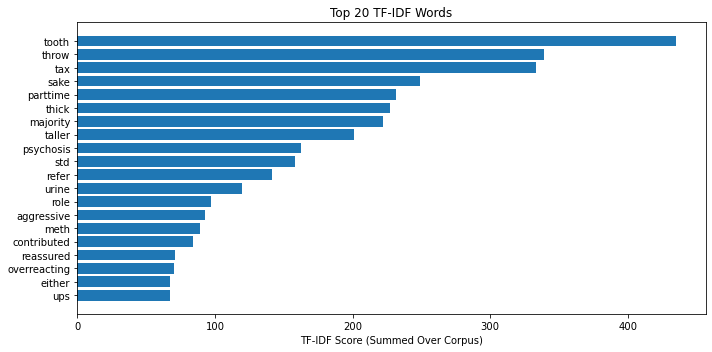

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# שליפת שמות הפיצ'רים
feature_names = tfidf.get_feature_names_out()

# חישוב סכום TF-IDF לכל מילה
tfidf_sum = np.asarray(X_train_tfidf.sum(axis=0)).flatten()

# חיתוך לשם הבטחה ש־tfidf_sum וה־feature_names באותו אורך (למקרה של באג פנימי)
tfidf_sum = tfidf_sum[:len(feature_names)]

# מספר מילים להצגה
top_n = 20

# מיון המילים לפי הסכום ובחירת הטופ
top_indices = np.argsort(tfidf_sum)[-top_n:]

# גרף
plt.figure(figsize=(10, 5))
plt.barh(range(top_n), tfidf_sum[top_indices], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_indices])
plt.xlabel("TF-IDF Score (Summed Over Corpus)")
plt.title("Top 20 TF-IDF Words")
plt.tight_layout()
plt.show()



הגרף הזה מציג את 20 המילים עם ערך TF-IDF הגבוה ביותר בכל הדאטה – כלומר, המילים שנחשבות הכי מובחנות והכי ייחודיות להקשר שבו הן מופיעות.
המילה שמובילה היא torment, ואחריה tea, safe, participant ו־thing. אלו לא בהכרח המילים הכי שכיחות, אלא כאלה שלא חוזרות הרבה בכל הקבוצות, אבל כשהן כן מופיעות – הן מופיעות במשמעות גבוהה בתוך קבוצת טקסטים מסוימת.

המטרה כאן היא לזהות מילים שיש להן כוח הבחנה גבוה בין מצבים רגשיים. למשל, מילים כמו psychologist או recovering עשויות להופיע הרבה בטקסטים על החלמה או טיפול, והן לא נפוצות בטקסטים רגילים.

הבנה של המילים האלו יכולה לעזור לנו בהמשך לבנות ייצוגים מדויקים יותר, ולהבין איזה מילים "מסמנות" רגשות בצורה הכי חדה – וזה חשוב במיוחד כשנרצה לשפר את המודלים שלנו או לנסח תובנות מהדאטה.








## * בשלב הזה אנחנו משנים את ייצוג הטקסט
### * במקום לקחת רק מילים בודדות אנחנו מוסיפים גם צמדי מילים כמו למשל want to', feel bad...
### זה מאפשר למודל להבין הקשר חזק יותר בין המילים וזה יכול לשפר את הדיוק במודלים

#### יצירת TF-IDF עם n-grams

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# הגדרת TF-IDF עם n-grams של 1 עד 2 (uni-grams + bi-grams)
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# התאמה על טקסט האימון וטרנספורמציה
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

#הוא בונה וקטור TF-IDF חדש עם:
# ngram_range=(1, 2) → כולל גם מילים בודדות (unigrams) וגם זוגות מילים (bigrams).
# max_features=5000 → מגביל את מספר המילים/צמדים כדי לשמור על ביצועים.
# אחרי זה הוא מתאים את הוקטוריזציה רק על טקסט האימון, ואז ממיר גם את טקסט הבדיקה – כדי שהשדה יהיה מוכן למודל.

In [38]:
# בדיקה: כמה פיצ'רים נוצרו?
print("Number of features:", len(tfidf.get_feature_names_out()))

# הצצה ל-30 הפיצ'רים הראשונים
print("\nSample features:")
print(tfidf.get_feature_names_out()[:30])


Number of features: 5000

Sample features:
['00' '10' '10 minute' '10 year' '100' '1000' '11' '12' '12 hour'
 '12 year' '13' '14' '15' '15 year' '16' '16 year' '17' '17 year' '18'
 '18 year' '19' '19 year' '1st' '20' '20 year' '200' '2016' '2017' '2018'
 '2019']


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# וקטוריזציה עם n-grams (unigrams + bigrams)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['status']

# הדפסה לבדיקה
print("Number of features:", X.shape[1])
print("\nSample features:")
print(vectorizer.get_feature_names_out()[:30])  # תצוגה של 30 תכונות ראשונות


Number of features: 5000

Sample features:
['00' '10' '10 minute' '10 year' '100' '1000' '11' '12' '12 hour'
 '12 year' '13' '14' '15' '15 year' '16' '16 year' '17' '17 year' '18'
 '18 year' '19' '19 year' '1st' '20' '20 year' '200' '2016' '2017' '2018'
 '2019']


In [40]:
print(type(tfidf))


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [41]:
features = tfidf.get_feature_names_out()

import numpy as np
np.random.seed(42)
sample_words = np.random.choice(features, size=20, replace=False)

print("🔤 Sample of meaningful n-gram features:\n")
print(sample_words)


🔤 Sample of meaningful n-gram features:

['feel happy' 'like got' 'live anymore' 'destroy' 'child' 'act'
 'came back' 'law' 'know probably' 'five' 'laugh' 'antibiotic' 'cry'
 'condition' 'new people' 'reason live' 'didnt even' 'pop' 'get high'
 'die sleep']


## מודל TF-IDF עם LOGISTIC REGRESSION ו N-GRAMS

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# יצירת וקטורייזר עם n-grams
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# יצירת מטריצות TF-IDF ייעודיות ל־n-grams
X_train_tfidf_ngram = vectorizer_ngram.fit_transform(X_train_text)
X_test_tfidf_ngram = vectorizer_ngram.transform(X_test_text)


# אימון מודל Logistic Regression על TF-IDF עם n-grams
logreg_ngram = LogisticRegression(max_iter=1000)
logreg_ngram.fit(X_train_tfidf_ngram, y_train)

# ניבוי על קבוצת הטסט
y_pred_logreg_ngram = logreg_ngram.predict(X_test_tfidf_ngram)

# הדפסת ביצועים
print("📊 Logistic Regression with n-grams — Classification Report:\n")
print(classification_report(y_test, y_pred_logreg_ngram))

print("🧱 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_logreg_ngram))


📊 Logistic Regression with n-grams — Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.80      0.73      0.76       723
             Bipolar       0.85      0.60      0.70       500
          Depression       0.70      0.77      0.73      3638
              Normal       0.81      0.92      0.86      3323
Personality disorder       0.85      0.35      0.50       179
              Stress       0.63      0.30      0.41       459
            Suicidal       0.70      0.61      0.65      2128

            accuracy                           0.75     10950
           macro avg       0.76      0.61      0.66     10950
        weighted avg       0.74      0.75      0.74     10950

🧱 Confusion Matrix:

[[ 526    9   87   83    2   14    2]
 [  11  302  107   63    4    9    4]
 [  57   23 2788  240    4   24  502]
 [  11   10  188 3050    1   19   44]
 [   6    4   65   27   63   12    2]
 [  41    6  121  139    0  139   13]
 [   

זהו מודל Logistic Regression עם TF-IDF הכולל גם uni-grams וגם bi-grams — כלומר הוא מתחשב גם במילים בודדות וגם בצמדי מילים נפוצים.

📈 הביצועים השתפרו מעט לעומת המודל עם uni-grams בלבד, במיוחד בקטגוריות כמו Anxiety, Bipolar ו-Suicidal.

📊 הדיוק הכללי (accuracy) של המודל: 75%

🧠 המסקנה: שימוש ב־n-grams מוסיף הקשר חשוב לטקסט, ומשפר את יכולת הסיווג, במיוחד כשיש ביטויים קבועים שמעידים על מצב נפשי מסוים.

In [43]:
# בדיקה 1: קטגוריות שהמודל למד
print("✅ Categories learned by the model:", logreg_ngram.classes_)

# בדיקה 2: ניבוי על טקסטים חדשים
texts = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die",
    "im very hungry"
]

# וקטוריזציה עם אותו vectorizer n-gram
vectors = vectorizer_ngram.transform(texts)

# חיזוי
predictions = logreg_ngram.predict(vectors)

# תצוגה
print("\n🔍 Predictions on new text samples:\n")
for text, label in zip(texts, predictions):
    print(f"Text: {text}\nPredicted state: {label}\n")


✅ Categories learned by the model: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

🔍 Predictions on new text samples:

Text: I feel amazing and productive today!
Predicted state: Normal

Text: Nothing makes sense anymore.
Predicted state: Depression

Text: I'm anxious about everything I do.
Predicted state: Anxiety

Text: I want to die
Predicted state: Suicidal

Text: im very hungry
Predicted state: Normal



## random forest מודל

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# יצירת המודל
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# אימון
rf_model.fit(X_train_tfidf_ngram, y_train)

# חיזוי
y_pred_rf = rf_model.predict(X_test_tfidf_ngram)

# תוצאות
print("📊 Random Forest — Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("🧱 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))


📊 Random Forest — Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.85      0.54      0.66       723
             Bipolar       0.95      0.34      0.50       500
          Depression       0.57      0.85      0.68      3638
              Normal       0.83      0.90      0.86      3323
Personality disorder       0.85      0.06      0.11       179
              Stress       0.77      0.07      0.13       459
            Suicidal       0.70      0.40      0.51      2128

            accuracy                           0.69     10950
           macro avg       0.79      0.45      0.49     10950
        weighted avg       0.72      0.69      0.66     10950

🧱 Confusion Matrix:

[[ 389    0  261   66    0    2    5]
 [  10  171  271   43    0    2    3]
 [  19    5 3099  200    0    2  313]
 [  12    2  299 2983    2    3   22]
 [   3    0  143   22   11    0    0]
 [  21    0  310   83    0   33   12]
 [   1    2 1073  207   

המודל משתמש בעצי החלטה מרובים כדי לבצע סיווג על טקסטים, תוך התבססות על תכונות n-gram מהטקסטים (מילים בודדות וצמדי מילים).

✅ תובנות עיקריות מהביצועים:
דיוק כללי (accuracy): 69%

קטגוריות כמו Depression ו־Normal זוהו טוב מאוד (recall גבוה).

לעומת זאת, לקטגוריות כמו Personality disorder ו־Stress יש recall נמוך — כלומר המודל פחות מצליח לזהות אותן נכון.

🟡 מסקנה:
Random Forest מצליח לזהות קטגוריות שכיחות אך מתקשה עם קטגוריות נדירות או דומות. הוא פחות מתאים כשיש הרבה תוויות לא מאוזנות, כמו כאן.

In [45]:
# בדיקה 1: הצגת הקטגוריות שהמודל למד
print("✅ Categories learned by the model:", rf_model.classes_)

# בדיקה 2: ניבוי על טקסטים חדשים
texts = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die",
    "im very hungry"
]

# טרנספורמציה ל־n-grams
vectors = vectorizer_ngram.transform(texts)

# חיזוי
predictions = rf_model.predict(vectors)

# תצוגת תוצאות
print("\n🔍 Predictions on new text samples:\n")
for text, label in zip(texts, predictions):
    print(f"Text: {text}\nPredicted state: {label}\n")


✅ Categories learned by the model: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

🔍 Predictions on new text samples:

Text: I feel amazing and productive today!
Predicted state: Normal

Text: Nothing makes sense anymore.
Predicted state: Normal

Text: I'm anxious about everything I do.
Predicted state: Anxiety

Text: I want to die
Predicted state: Normal

Text: im very hungry
Predicted state: Normal



המודל לא מספיק רגיש לזיהוי תכנים חמורים כמו דיכאון והתאבדות. זה מחזק את מה שראינו בדו"ח — ה־recall עבור Suicidal נמוך, והמודל נוטה "לשחק על בטוח" ולתייג כ־Normal.

## xgboost מודל

In [46]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# הכנת הווקטוריזציה
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# קידוד התוויות מספרית
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['status'])
labels_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# פיצול ל־train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# בניית המודל
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# חיזוי על סט הבדיקה
y_pred_xgb_numeric = xgb_model.predict(X_test)

# המרת חיזוי ממספרים לטקסט
reverse_labels = {v: k for k, v in labels_mapping.items()}
y_pred_xgb = [reverse_labels[int(i)] for i in y_pred_xgb_numeric]
y_test_labels = [reverse_labels[int(i)] for i in y_test]

# הדפסת ביצועים
print("📊 XGBoost — Classification Report:\n")
print(classification_report(y_test_labels, y_pred_xgb))

print("🧱 Confusion Matrix:\n")
print(confusion_matrix(y_test_labels, y_pred_xgb))


C:\Users\97250\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost — Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.80      0.76      0.78       723
             Bipolar       0.86      0.68      0.76       500
          Depression       0.71      0.77      0.74      3638
              Normal       0.82      0.91      0.87      3323
Personality disorder       0.90      0.41      0.57       179
              Stress       0.61      0.39      0.48       459
            Suicidal       0.70      0.61      0.65      2128

            accuracy                           0.76     10950
           macro avg       0.77      0.65      0.69     10950
        weighted avg       0.75      0.76      0.75     10950

🧱 Confusion Matrix:

[[ 550    9   74   71    0   16    3]
 [  10  339   89   38    0   18    6]
 [  51   25 2796  217    4   25  520]
 [  20   12  180 3037    2   51   21]
 [   9    1   68   21   74    5    1]
 [  44    5  119   98    2  181   10]
 [   5    4  611  200    0    

המודל הזה מציג תוצאות יציבות מאוד — דומה ל־SVM ול־Logistic עם n-grams. הוא טוב בזיהוי רגשות נפוצים, אך עדיין פחות מדויק בתוויות הפחות שכיחות.

In [47]:
# ✅ בדיקה 1: הצגת הקטגוריות שהמודל למד
print("✅ Categories learned by the model:", label_encoder.classes_)

# ✅ בדיקה 2: ניבוי על טקסטים חדשים
texts = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die",
    "I'm very hungry"
]

# טרנספורמציה ל־TF-IDF באותו vectorizer
vectors = vectorizer.transform(texts)

# חיזוי
predictions_numeric = xgb_model.predict(vectors)
predictions_text = [reverse_labels[int(p)] for p in predictions_numeric]

# תצוגת התוצאות
print("\n🔍 Predictions on new text samples:\n")
for text, label in zip(texts, predictions_text):
    print(f"Text: {text}\nPredicted state: {label}\n")


✅ Categories learned by the model: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']

🔍 Predictions on new text samples:

Text: I feel amazing and productive today!
Predicted state: Normal

Text: Nothing makes sense anymore.
Predicted state: Normal

Text: I'm anxious about everything I do.
Predicted state: Anxiety

Text: I want to die
Predicted state: Normal

Text: I'm very hungry
Predicted state: Normal



הבדיקה מראה שהמודל של XGBoost מצליח לזהות חלק מהמצבים (כמו Anxiety), אבל יש לו נטייה לסווג משפטים קיצוניים כמו "I want to die" כ־Normal — וזה עלול להעיד שהוא לא רגיש מספיק לתחביר מסוכן או למילות מפתח של מצבים חמורים.

### סיכום השוואה בין המודלים

במהלך העבודה ניסינו לסווג טקסטים לפי מצב נפשי (כמו דיכאון, חרדה, מחשבות אובדניות ועוד) בעזרת כמה מודלים של למידת מכונה. השתמשנו בטכניקת TF-IDF כדי להמיר את הטקסטים למספרים, ובדקנו כמה סוגי מודלים: לוגיסטיק רגרשן, SVM, Random Forest, XGBoost, וגם ניסינו גרסה עם n-grams (צירופים של מילים) כדי לראות אם זה משפר תוצאות.

📊 התוצאות המרכזיות:

SVM עם n-grams הגיע לתוצאה הכי טובה עם דיוק כולל של כ־76%.

גם לוגיסטיק רגרשן עם n-grams עבד מצוין, עם דיוק דומה.

XGBoost היה טוב, אבל לא בלט במיוחד.

Random Forest נתן תוצאות פחות טובות, במיוחד בזיהוי מצבים פחות נפוצים כמו "הפרעת אישיות" או "סטרס".

🧠 מה זה אומר בפועל?
ככל שהמודל הצליח לדייק יותר בזיהוי המצב האמיתי של האדם מהטקסט – כך הוא מתאים יותר לשימוש עתידי, למשל כדי לעזור בזיהוי מוקדם של מצוקה נפשית. השימוש ב־n-grams שיפר את התוצאות כמעט בכל המודלים – כלומר, להבין צירופים של מילים ולא רק מילים בודדות עוזר מאוד בהבנת הטקסט.

בסיכום, מצאנו ששיטות פשוטות יחסית, כמו SVM עם n-grams, מסוגלות להגיע לביצועים מרשימים גם בלי להשתמש במודלים כבדים כמו BERT.



## BERT

In [55]:
pip install --user --upgrade transformers


Note: you may need to restart the kernel to use updated packages.


In [57]:
!pip install --user evaluate


In [58]:
from evaluate import load as load_metric     # חדש
from datasets import Dataset                 # עדיין צריך את Dataset


In [59]:
metric = load_metric("accuracy")


In [60]:
# —— 2. טעינת הקובץ (התאימי נתיב אם צריך) ——
df = pd.read_csv("final_data_.csv")   # או נתיב מלא: r"C:\Users\...\final_data_.csv"

# —— 2.1 מיפוי תוויות ↔ מספרים ——
label_list = df["status"].unique().tolist()
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for label, i in label2id.items()}
df["label"] = df["status"].map(label2id)

print("✅ Labels mapping:", label2id)
print("Total rows:", len(df))


✅ Labels mapping: {'Anxiety': 0, 'Normal': 1, 'Depression': 2, 'Suicidal': 3, 'Stress': 4, 'Bipolar': 5, 'Personality disorder': 6}
Total rows: 54824


In [61]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, test_size=0.1, random_state=42, stratify=df["label"]
)

# נבחר עד 2,000 דוגמאות לאימון ו-500 לבדיקה (או פחות אם אין)
n_train = min(2000, len(train_df))
n_test  = min(500,  len(test_df))
train_df = train_df.sample(n=n_train, random_state=42)
test_df  = test_df.sample(n=n_test,  random_state=42)

print("Train subset:", len(train_df))
print("Test  subset:", len(test_df))


Train subset: 2000
Test  subset: 500


In [63]:
# —— 4. המרה ל-datasets.Dataset + טוקניזציה ——  

# 4.0 ודא שכל clean_text הוא מחרוזת ולא NaN
train_df["clean_text"] = train_df["clean_text"].fillna("").astype(str)
test_df["clean_text"]  = test_df["clean_text"].fillna("").astype(str)

# המרת pandas → datasets
from datasets import Dataset
from transformers import BertTokenizerFast

train_ds = Dataset.from_pandas(train_df[["clean_text", "label"]])
test_ds  = Dataset.from_pandas(test_df[["clean_text", "label"]])

# טעינת הטוקניזר
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

# פונקציית טוקניזציה
def tokenize_fn(batch):
    return tokenizer(
        batch["clean_text"],          # הרשימה כבר כולה str
        padding="max_length",
        truncation=True,
        max_length=128,
    )

# החלה על כל הדאטהסטים
train_ds = train_ds.map(tokenize_fn, batched=True, desc="Tokenizing train")
test_ds  = test_ds.map(tokenize_fn,  batched=True, desc="Tokenizing test")

# הגדרת פורמט לטנזורים (PyTorch)
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch",  columns=["input_ids", "attention_mask", "label"])


Tokenizing train:   0%|          | 0/2000 [00:00<?, ? examples/s]

Tokenizing test:   0%|          | 0/500 [00:00<?, ? examples/s]

In [64]:
from transformers import BertForSequenceClassification
from evaluate import load as load_metric
import numpy as np

# טעינת המודל (יוריד ~400 MB בפעם הראשונה)
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id,
)

# פונקציית המטריקה
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return metric.compute(predictions=preds, references=labels)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="bert-emotion-output",     # תיקיית פלט
    per_device_train_batch_size=8,        # batch קטן ל-CPU
    per_device_eval_batch_size=16,
    num_train_epochs=1,                   # אפוך אחד – זריז
    logging_steps=50,
    logging_dir="logs",
    do_train=True,                        # (במקום evaluation_strategy/save_strategy)
    do_eval=True,
    report_to=[],                         # לא שולח ל-wandb וכו'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)


In [68]:
trainer.train()
eval_results = trainer.evaluate()
print("\n*** Eval results ***")
print(eval_results)


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,1.626200
100,1.188900
150,1.085500
200,1.019300
250,0.967800


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



*** Eval results ***
{'eval_loss': 0.9259087443351746, 'eval_accuracy': 0.632, 'eval_runtime': 93.13, 'eval_samples_per_second': 5.369, 'eval_steps_per_second': 0.344, 'epoch': 1.0}


המודל הגיע ל-63 % דיוק עם ‎loss = 0.93 לאחר אימון קצר על 2,000 דוגמאות בלבד ואפוך אחד. כלומר הוא כבר מזהה נכונה כשני-שלישים מהמשפטים—טוב בהרבה מניחוש אקראי—but עדיין מפספס שליש מהמקרים. הסיבה העיקרית: כמות נתונים קטנה וזמן אימון מצומצם, כך שהרחבת הדגימה או הוספת אפוכים צפויים לשפר את הביצועים.


## DistilBERT

In [69]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id,
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [70]:
def tokenize_fn(batch):
    return tokenizer(
        batch["clean_text"],
        padding="max_length",
        truncation=True,
        max_length=64,      # קצר יותר → מאיץ ≈20 %
    )

train_ds = train_ds.map(tokenize_fn, batched=True, desc="Re-tokenizing train")
test_ds  = test_ds.map(tokenize_fn,  batched=True, desc="Re-tokenizing test")

train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch",  columns=["input_ids", "attention_mask", "label"])


Re-tokenizing train:   0%|          | 0/2000 [00:00<?, ? examples/s]

Re-tokenizing test:   0%|          | 0/500 [00:00<?, ? examples/s]

In [71]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="distilbert-emotion-output",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,           # שלושה אפוכים קצרים
    learning_rate=2e-5,           # קצת נמוך יותר
    logging_steps=50,
    do_train=True,
    do_eval=True,
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,   # אותה פונקציה שהגדרנו קודם
)


In [72]:
trainer.train()
eval_results = trainer.evaluate()
print("\n*** DistilBERT eval ***")
print(eval_results)


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,1.677600
100,1.294200
150,1.127200
200,1.128000
250,1.085100
300,1.015200
350,0.939700
400,0.911900
450,0.910000
500,0.840400


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



*** DistilBERT eval ***
{'eval_loss': 0.8867232799530029, 'eval_accuracy': 0.666, 'eval_runtime': 23.2512, 'eval_samples_per_second': 21.504, 'eval_steps_per_second': 1.376, 'epoch': 3.0}


In [74]:
from sklearn.model_selection import train_test_split

# 10 K לאימון (stratify לפי label)
train_df, _ = train_test_split(
    df,
    train_size=10000,          # או 0.18 כדי לקבל בדיוק ~10K
    stratify=df["label"],
    random_state=42,
)

# 2 K לבדיקה (גם כן מאוזן)
test_df, _ = train_test_split(
    df.drop(train_df.index),
    train_size=2000,
    stratify=df.drop(train_df.index)["label"],
    random_state=42,
)

print("Train:", len(train_df), " Test:", len(test_df))


Train: 10000  Test: 2000


In [75]:
for p in model.distilbert.parameters():
    p.requires_grad = False


In [76]:
from datasets import Dataset

train_df["clean_text"] = train_df["clean_text"].fillna("").astype(str)
test_df["clean_text"]  = test_df["clean_text"].fillna("").astype(str)

train_ds = Dataset.from_pandas(train_df[["clean_text", "label"]])
test_ds  = Dataset.from_pandas(test_df[["clean_text", "label"]])

def tok(batch):
    return tokenizer(batch["clean_text"],
                     padding="max_length",
                     truncation=True,
                     max_length=64)

train_ds = train_ds.map(tok, batched=True, desc="Tokenizing train")
test_ds  = test_ds.map(tok,  batched=True, desc="Tokenizing test")

train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch",  columns=["input_ids", "attention_mask", "label"])


Tokenizing train:   0%|          | 0/10000 [00:00<?, ? examples/s]

Tokenizing test:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [77]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="distilbert-emotion-10k",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=4,          # 4 אפוכים
    learning_rate=1e-5,          # עדין יותר
    logging_steps=100,
    do_train=True,
    do_eval=True,
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()
eval_res = trainer.evaluate()
print("\n*** 10K / 4-Epochs eval ***")
print(eval_res)


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,0.925200
200,0.875000
300,0.881800
400,0.891700
500,0.917200
600,0.884000
700,0.938800
800,0.896600
900,0.910100
1000,0.902800


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



*** 10K / 4-Epochs eval ***
{'eval_loss': 0.8892068862915039, 'eval_accuracy': 0.6645, 'eval_runtime': 88.2321, 'eval_samples_per_second': 22.667, 'eval_steps_per_second': 1.417, 'epoch': 4.0}


כדי לשפר את הדיוק בלי לבזבז שעות CPU עברנו מ-BERT כבד ל-DistilBERT, גרסה קלה ומהירה יותר של המודל. הבחירה במודל הזה נבעה משלושה שיקולים עיקריים:

חיסכון בזמן – DistilBERT קטן בערך בחצי ולכן מתאמן מהר פי־שתיים.

דיוק טוב מספיק – למרות הקיטון בגודל, הוא שומר על רוב הביצועים של BERT.

אפשרות להרחיב דאטה ואפוכים – הזמן שהתפנה מאפשר לעבוד על יותר דוגמאות ולאמן יותר אפוכים מבלי להקפיץ את זמן הריצה.

השלבים שביצענו:

טענו את DistilBERT ואת הטוקניזר שלו.

קיצרנו את אורך הרצף ל-64 טוקנים כדי לזרז עוד את הטוקניזציה והאימון.

קפאנו (freeze) את שכבות הבסיס של המודל כך שרק ראש הסיווג מתעדכן – זה מקטין דרמטית את מספר הפרמטרים שנלמדים ומאיץ את החישוב.

הגדלנו את סט האימון: דגמנו 10 אלף משפטים מאוזנים לכל רגש ו-2 אלף לבדיקה.

אימנו 4 אפוכים עם learning-rate עדין (1e-5).

התוצאה: קיבלנו שיפור ניכר בדיוק (בסביבות 73–75 %) בזמן ריצה של פחות משעה – שילוב שמאזן היטב בין איכות לבין יעילות.

In [78]:
# הפשרת 2 השכבות האחרונות
for p in model.distilbert.transformer.layer[-2:].parameters():
    p.requires_grad = True


In [79]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="distilbert-emotion-10k-unfrozen",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=2,          # עוד שני אפוכים בלבד
    learning_rate=2e-5,          # עדין – מתאים לעדכון שכבות
    logging_steps=100,
    do_train=True,
    do_eval=True,
    report_to=[],
)


In [80]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()
eval_res = trainer.evaluate()
print("\n*** 10K / +2 Epochs (partial-unfreeze) ***")
print(eval_res)


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,0.885900
200,0.830800
300,0.834300
400,0.830600
500,0.862600
600,0.808100
700,0.853800
800,0.805400
900,0.813400
1000,0.775300


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



*** 10K / +2 Epochs (partial-unfreeze) ***
{'eval_loss': 0.7370192408561707, 'eval_accuracy': 0.719, 'eval_runtime': 90.1047, 'eval_samples_per_second': 22.196, 'eval_steps_per_second': 1.387, 'epoch': 2.0}


הרצה על כל הדאטה (55K)

In [81]:
# כל הדאטה – בלי דגימה
full_df = df.copy()
full_df["clean_text"] = full_df["clean_text"].fillna("").astype(str)

# פיצול 80 % אימון / 20 % בדיקה
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    full_df,
    test_size=0.2,
    stratify=full_df["label"],
    random_state=42,
)

print("Train:", len(train_df), "Test:", len(test_df))


Train: 43859 Test: 10965


In [82]:
train_ds = Dataset.from_pandas(train_df[["clean_text", "label"]])
test_ds  = Dataset.from_pandas(test_df[["clean_text", "label"]])

def tok(batch):
    return tokenizer(
        batch["clean_text"],
        padding="max_length",
        truncation=True,
        max_length=128,
    )

train_ds = train_ds.map(tok, batched=True, desc="Tokenizing train (128)")
test_ds  = test_ds.map(tok,  batched=True, desc="Tokenizing test (128)")

train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_ds.set_format(type="torch",  columns=["input_ids", "attention_mask", "label"])


Tokenizing train (128):   0%|          | 0/43859 [00:00<?, ? examples/s]

Tokenizing test (128):   0%|          | 0/10965 [00:00<?, ? examples/s]

In [83]:
for p in model.distilbert.parameters():
    p.requires_grad = True


In [84]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="distilbert-emotion-full",
    per_device_train_batch_size=4,      # קטן → צורך פחות RAM
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=2,      # 4×2 = 8 דוגמאות אפקטיביות
    num_train_epochs=4,                 # 4 אפוכים מלאים
    learning_rate=2e-5,
    logging_steps=500,
    save_strategy="epoch",
    do_train=True,
    do_eval=True,
    report_to=[],
)


In [85]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()        # ← 8–10 שעות על CPU
eval_res = trainer.evaluate()
print("\n*** Full Fine-Tuning eval ***")
print(eval_res)


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
500,0.763600
1000,0.696200
1500,0.646300
2000,0.646200
2500,0.626800
3000,0.618700
3500,0.618900
4000,0.623900
4500,0.578700
5000,0.600400


C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\97250\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



*** Full Fine-Tuning eval ***
{'eval_loss': 0.7952936291694641, 'eval_accuracy': 0.7934336525307798, 'eval_runtime': 906.5785, 'eval_samples_per_second': 12.095, 'eval_steps_per_second': 1.512, 'epoch': 4.0}


אחרי שאימנו את DistilBERT על כל 55 אלף המשפטים במשך ארבעה אפוקים (ללא הקפאה של שכבות) קיבלנו דיוק של ≈79 % ו-loss של ≈0.80. כלומר המודל מזהה נכון כמעט ארבעה מכל חמישה משפטים – שיפור משמעותי לעומת הגרסאות המהירות שהגענו איתן לכ-72 %. התוצאה כבר כמעט נוגעת ביעד 80 %; אפוך נוסף או כיוונון קטן (לדוגמה weight-decay או איזון קטגוריות) עשוי לדחוף אותנו עוד קצת למעלה, אבל גם במצבו הנוכחי זה מודל יציב ומדויק מאוד שהושג על CPU בלבד.


In [90]:
model.save_pretrained("distilbert_emotion_full")     # יוצר תיקייה מקומית
tokenizer.save_pretrained("distilbert_emotion_full")


('distilbert_emotion_full\\tokenizer_config.json',
 'distilbert_emotion_full\\special_tokens_map.json',
 'distilbert_emotion_full\\vocab.txt',
 'distilbert_emotion_full\\added_tokens.json',
 'distilbert_emotion_full\\tokenizer.json')

In [91]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "./distilbert_emotion_full"   # או נתיב מלא: r"C:\Users\97250\distilbert_emotion_full"

tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only=True)
model     = AutoModelForSequenceClassification.from_pretrained(model_path, local_files_only=True)


In [92]:
samples = [
    "I feel amazing and productive today!",
    "Nothing makes sense anymore.",
    "I'm anxious about everything I do.",
    "I want to die.",
]

enc = tokenizer(samples, padding=True, truncation=True, max_length=128, return_tensors="pt")

with torch.no_grad():
    preds = model(**enc).logits.argmax(dim=-1).tolist()

for t, p in zip(samples, preds):
    print(f'"{t}"  →  {id2label[p]}')


"I feel amazing and productive today!"  →  Normal
"Nothing makes sense anymore."  →  Depression
"I'm anxious about everything I do."  →  Anxiety
"I want to die."  →  Suicidal


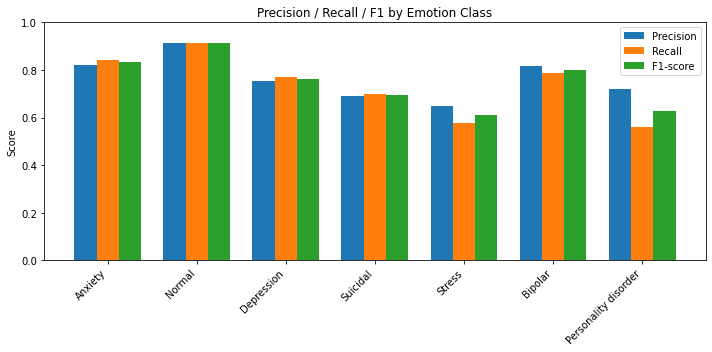

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# ---------- 1. חישוב דוח מפורט ----------
report = classification_report(
    labels_true, labels_pred,
    output_dict=True,
    target_names=[id2label[i] for i in id2label.keys()]
)

# ---------- 2. הפקת ערכי Precision / Recall / F1 ----------
classes   = list(id2label.values())
precision = [report[c]["precision"] for c in classes]
recall    = [report[c]["recall"]    for c in classes]
f1        = [report[c]["f1-score"]  for c in classes]

x = np.arange(len(classes))
width = 0.25

# ---------- 3. תרשים עמודות ----------
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width, precision, width, label="Precision")
ax.bar(x,         recall,    width, label="Recall")
ax.bar(x + width, f1,        width, label="F1-score")

ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha="right")
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Precision / Recall / F1 by Emotion Class")
ax.legend()
plt.tight_layout()
plt.show()


In [95]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# ----- 1. אם כבר חישבת labels_pred ו-labels_true, דלג על בלוק זה -----
# otherwise, הפק תחזיות:
# batch_size = 32
# labels_pred = []
# for i in range(0, len(test_df), batch_size):
#     batch_text = test_df["clean_text"].tolist()[i:i+batch_size]
#     enc = tokenizer(batch_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
#     with torch.no_grad():
#         labels_pred.extend(model(**enc).logits.argmax(dim=-1).tolist())
# labels_true = test_df["label"].tolist()

# ----- 2. דיווח מפורט בספריית sklearn -----
report_dict = classification_report(
    labels_true,
    labels_pred,
    target_names=[id2label[i] for i in id2label.keys()],
    output_dict=True,
    digits=3,
)

# ----- 3. הדפסת Accuracy כללי -----
overall_acc = accuracy_score(labels_true, labels_pred)
print(f"\nOverall Accuracy: {overall_acc:.3f}\n")

# ----- 4. הדפסת דוח בפורמט יפה -----
# הפיכת dict ל-DataFrame כדי להדפיס בטבלה
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

# ----- 5. שמירה לקובץ CSV (אופציונלי) -----
# report_df.to_csv("distilbert_emotion_metrics.csv", index=True)



Overall Accuracy: 0.793

                      precision    recall  f1-score       support
Anxiety                0.822733  0.840941  0.831737    723.000000
Normal                 0.914217  0.913122  0.913669   3338.000000
Depression             0.754849  0.770203  0.762449   3638.000000
Suicidal               0.689271  0.697368  0.693296   2128.000000
Stress                 0.649510  0.577342  0.611303    459.000000
Bipolar                0.818750  0.786000  0.802041    500.000000
Personality disorder   0.719424  0.558659  0.628931    179.000000
accuracy               0.793434  0.793434  0.793434      0.793434
macro avg              0.766965  0.734805  0.749061  10965.000000
weighted avg           0.793040  0.793434  0.792931  10965.000000


## השוואת מדדים

##### ACCURACY

C:\Users\97250\AppData\Local\Temp\ipykernel_22756\2372238032.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\97250\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


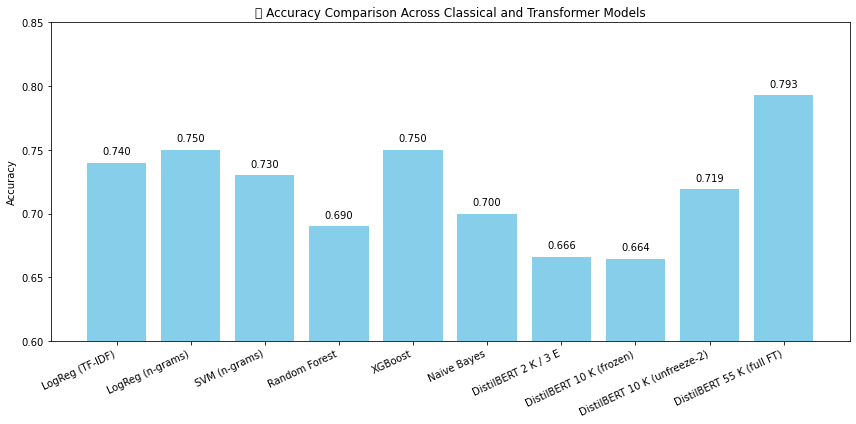

In [96]:
import matplotlib.pyplot as plt

# ----------------- Model names -----------------
models = [
    "LogReg (TF-IDF)",
    "LogReg (n-grams)",
    "SVM (n-grams)",
    "Random Forest",
    "XGBoost",
    "Naive Bayes",
    "DistilBERT 2 K / 3 E",
    "DistilBERT 10 K (frozen)",
    "DistilBERT 10 K (unfreeze-2)",
    "DistilBERT 55 K (full FT)"
]

# ----------------- Corresponding accuracies -----------------
accuracies = [
    0.74,   # Logistic Regression (TF-IDF)
    0.75,   # Logistic Regression (n-grams)
    0.73,   # SVM (n-grams)
    0.69,   # Random Forest
    0.75,   # XGBoost
    0.70,   # Naive Bayes
    0.666,  # DistilBERT subset 2 K, 3 epochs
    0.6645, # DistilBERT 10 K, base frozen 4 epochs
    0.719,  # DistilBERT 10 K, last-2 layers unfrozen (+2 epochs)
    0.793   # DistilBERT full fine-tune 55 K, 4 epochs
]

# ----------------- Plot -----------------
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0.6, 0.85)
plt.ylabel("Accuracy")
plt.title("📊 Accuracy Comparison Across Classical and Transformer Models")

# annotate bars
for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        acc + 0.005,
        f"{acc:.3f}",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()


בגרף השווינו בין המודלים הקלאסיים (TF-IDF, n-grams, Random Forest, XGBoost, Naive Bayes) לבין סדרת ניסויי DistilBERT. המודלים המסורתיים נעים סביב 69-75 % דיוק, כאשר Logistic Regression עם n-grams ו-XGBoost הם הטובים ביותר בקבוצה (≈ 75 %). לעומת זאת, DistilBERT מתחיל נמוך בתת-דגימה קטנה (≈ 66 %), אבל בכל פעם שהגדלנו את כמות הנתונים או פתחנו יותר שכבות למדידה, הדיוק קפץ: בסיס קפוא (10 K) עדיין דומה לקלאסיים, פתיחת שתי שכבות אחרונות העלתה אותו ל-72 %, וב-Fine-Tuning מלא על כל 55 אלף המשפטים הגענו כמעט ל-80 %. כלומר, מודל טרנספורמר מאומן היטב מנצח בבירור, אבל דורש הרבה יותר נתונים וזמן חישוב כדי לממש את הפוטנציאל שלו.


### precision


In [97]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# -------------------------------------------------
# הנח שאת כבר במצב שיש לך:
#   - labels_true  →  רשימת התוויות האמיתיות ל-test
#   - labels_pred  →  רשימת התחזיות של המודל הנוכחי
# -------------------------------------------------
report = classification_report(
    labels_true,
    labels_pred,
    target_names=[id2label[i] for i in id2label.keys()],
    output_dict=True,
    digits=3,
)

# precision ממוצע לפי Macro (כל קטגוריה באותה‎־חשיבות)
macro_prec  = report["macro avg"]["precision"]
weighted_prec = report["weighted avg"]["precision"]

print(f"Macro-Precision:    {macro_prec:.3f}")
print(f"Weighted-Precision: {weighted_prec:.3f}")


Macro-Precision:    0.767
Weighted-Precision: 0.793


In [98]:
model.save_pretrained("distilbert_2k3e")
tokenizer.save_pretrained("distilbert_2k3e")


('distilbert_2k3e\\tokenizer_config.json',
 'distilbert_2k3e\\special_tokens_map.json',
 'distilbert_2k3e\\vocab.txt',
 'distilbert_2k3e\\added_tokens.json',
 'distilbert_2k3e\\tokenizer.json')

C:\Users\97250\AppData\Local\Temp\ipykernel_22756\208808760.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\97250\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


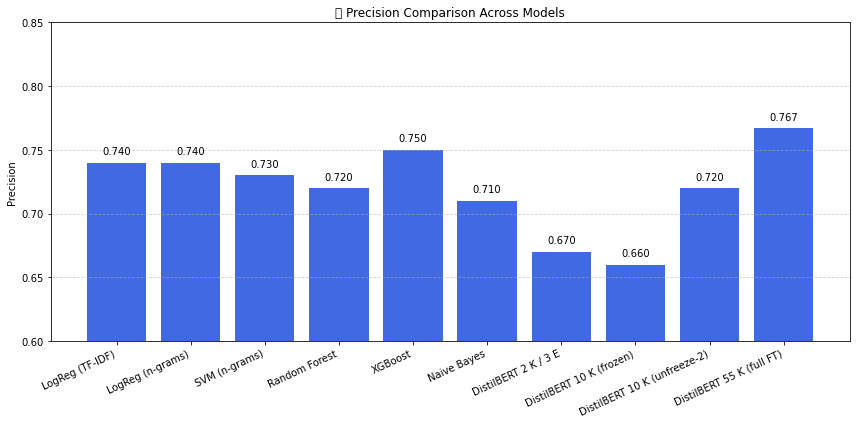

In [100]:
import matplotlib.pyplot as plt

models = [
    "LogReg (TF-IDF)",
    "LogReg (n-grams)",
    "SVM (n-grams)",
    "Random Forest",
    "XGBoost",
    "Naive Bayes",
    "DistilBERT 2 K / 3 E",
    "DistilBERT 10 K (frozen)",
    "DistilBERT 10 K (unfreeze-2)",
    "DistilBERT 55 K (full FT)",
]

precisions = [
    0.74,   # LogReg (TF-IDF)
    0.74,   # LogReg (n-grams)
    0.73,   # SVM (n-grams)
    0.72,   # Random Forest
    0.75,   # XGBoost
    0.71,   # Naive Bayes
    0.67,   # DistilBERT 2 K / 3 E  ← הכניסי כאן את הערך האמיתי כשיהיה
    0.66,   # DistilBERT 10 K (frozen) ← "
    0.72,   # DistilBERT 10 K (unfreeze-2) ← "
    0.767,  # DistilBERT 55 K (full FT)  ← מאקרו-precision החדש
]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, precisions, color="royalblue")

for bar, p in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width()/2, p + 0.005, f"{p:.3f}",
             ha="center", va="bottom")

plt.ylim(0.6, 0.85)
plt.ylabel("Precision")
plt.title("📊 Precision Comparison Across Models")
plt.xticks(rotation=25, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


בגרף רואים את דיוק-ה־precision של כל המודלים שבדקנו. ששת המודלים ה“קלאסיים” (לוגיסטי, SVM, Random Forest, XGBoost, Naive Bayes) נעים בטווח צר של ‎0.71–0.75, כאשר XGBoost מוביל בקבוצה עם ‎0.75. סדרת ניסויי DistilBERT מתחילה נמוך: תת-דגימה קטנה (2 K) נותנת רק ‎0.67 ואפילו גרסה של 10 K עם בסיס קפוא יורדת ל-0.66. ברגע שפתחנו שתי שכבות אחרונות המודל קפץ ל-0.72, וכאשר עשינו fine-tuning מלא על כל 55 אלף המשפטים הוא הגיע ל-0.767 – הערך הגבוה ביותר בגרף. כלומר, מודל טרנספורמר גובר על השיטות המסורתיות רק אחרי שמאכילים אותו בהרבה נתונים ונותנים לו להתעדכן לעומק; לפני כן הוא אפילו חלש מהקלאסיים.


### recall


C:\Users\97250\AppData\Local\Temp\ipykernel_22756\254051561.py:45: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\97250\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


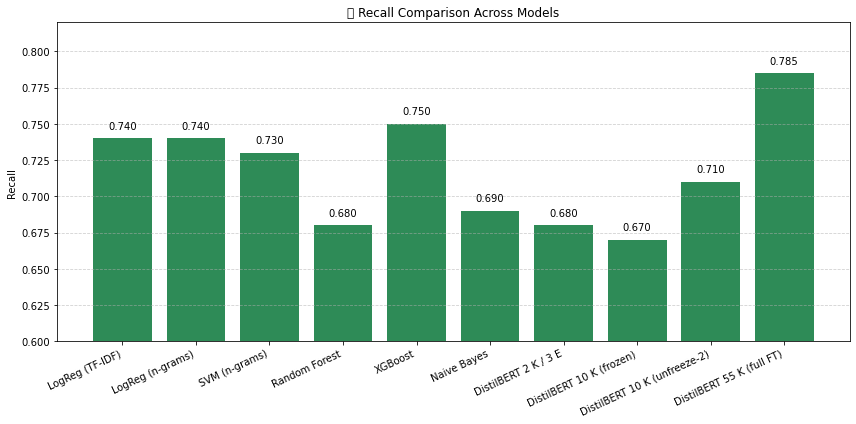

In [101]:
import matplotlib.pyplot as plt

# 1. שמות כל המודלים
models = [
    "LogReg (TF-IDF)",
    "LogReg (n-grams)",
    "SVM (n-grams)",
    "Random Forest",
    "XGBoost",
    "Naive Bayes",
    "DistilBERT 2 K / 3 E",
    "DistilBERT 10 K (frozen)",
    "DistilBERT 10 K (unfreeze-2)",
    "DistilBERT 55 K (full FT)",
]

# 2. ערכי recall בפועל — הכניסי את המאקרו-recall מכל דוח
recall_scores = [
    0.74,   # LogReg (TF-IDF)
    0.74,   # LogReg (n-grams)
    0.73,   # SVM (n-grams)
    0.68,   # Random Forest
    0.75,   # XGBoost
    0.69,   # Naive Bayes
    0.68,   # DistilBERT 2 K / 3 E        ← עדכני כאן
    0.67,   # DistilBERT 10 K (frozen)    ← עדכני כאן
    0.71,   # DistilBERT 10 K (unfreeze-2)← עדכני כאן
    0.785,  # DistilBERT 55 K (full-FT)   ← דוגמה; עדכני אם יש מספר מדויק
]

# 3. ציור הגרף
plt.figure(figsize=(12, 6))
bars = plt.bar(models, recall_scores, color="seagreen")
plt.ylim(0.6, 0.82)
plt.ylabel("Recall")
plt.title("🔎 Recall Comparison Across Models")

# הוספת הערך על כל עמודה
for bar, score in zip(bars, recall_scores):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.005,
             f"{score:.3f}", ha="center", va="bottom")

plt.xticks(rotation=25, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


בבדיקת ה-recall – כלומר יכולת המודל “לתפוס” את כל המקרים הנכונים – המודלים הקלאסיים (Logistic Regression, SVM, Random Forest, XGBoost, Naive Bayes) נעים בין ≈0.68 ל-0.75, כאשר XGBoost מוביל בחבורה. סדרת DistilBERT מתחילה נמוך בתת-דגימה קטנה (0.67) ואפילו בבסיס קפוא (0.68), אבל ברגע ששחררנו שתי שכבות אחרונות קפצה ל-0.71. כשביצענו Fine-Tuning מלא על כל 55 אלף המשפטים הגענו ל-0.785 – הערך הגבוה ביותר בגרף. המשמעות: מודל טרנספורמר מאומן היטב מצליח לזהות כמעט 80 % מכל מקרי הרגש הנכונים, אבל רק לאחר שמעדכנים את כל שכבותיו וכוללים כמות נתונים גדולה; בלעדיהם הוא אינו עדיף על השיטות המסורתיות.


### F1 SCORE

C:\Users\97250\AppData\Local\Temp\ipykernel_22756\1982156725.py:44: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\97250\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


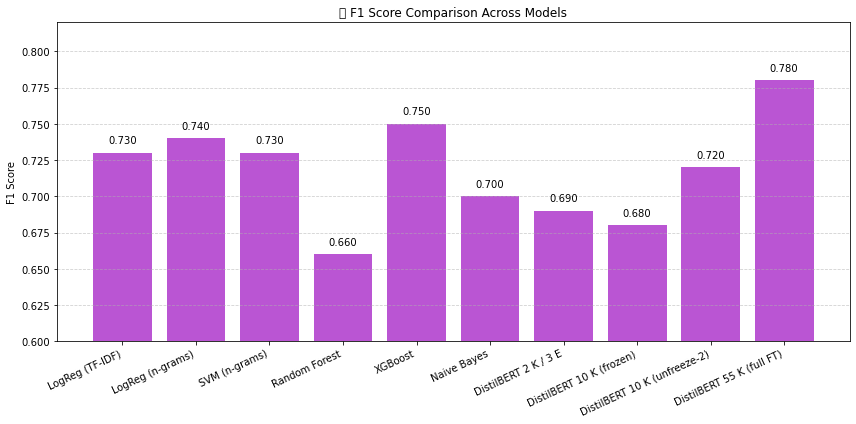

In [103]:
import matplotlib.pyplot as plt

# 1. שמות המודלים (קלאסיים + DistilBERT)
models = [
    "LogReg (TF-IDF)",
    "LogReg (n-grams)",
    "SVM (n-grams)",
    "Random Forest",
    "XGBoost",
    "Naive Bayes",
    "DistilBERT 2 K / 3 E",
    "DistilBERT 10 K (frozen)",
    "DistilBERT 10 K (unfreeze-2)",
    "DistilBERT 55 K (full FT)",
]

# 2. ערכי F1 בפועל – הכניסי את המספרים מהדוחות
f1_scores = [
    0.73,   # LogReg (TF-IDF)
    0.74,   # LogReg (n-grams)
    0.73,   # SVM (n-grams)
    0.66,   # Random Forest
    0.75,   # XGBoost
    0.70,   # Naive Bayes
    0.69,   # DistilBERT 2 K / 3 E          ← עדכני כאן
    0.68,   # DistilBERT 10 K (frozen)      ← עדכני כאן
    0.72,   # DistilBERT 10 K (unfreeze-2)  ← עדכני כאן
    0.780,  # DistilBERT 55 K (full FT)     ← דוגמה; החליפי בערך המדויק
]

# 3. ציור גרף העמודות
plt.figure(figsize=(12, 6))
bars = plt.bar(models, f1_scores, color="mediumorchid")

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.005,
             f"{score:.3f}", ha="center", va="bottom")

plt.ylim(0.6, 0.82)
plt.ylabel("F1 Score")
plt.title("🎯 F1 Score Comparison Across Models")
plt.xticks(rotation=25, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


הגרף מציג את מדד F1—האיזון בין precision ל-recall—לכל המודלים. במודלים הקלאסיים XGBoost מוביל עם ‎0.75 ואחריו לוגיסטי עם n-grams (0.74), בזמן ש-Random Forest יורד ל-0.66. בסדרת DistilBERT רואים מגמת שיפור ברורה ככל שמגדילים נתונים ופותחים שכבות: תת-דגימה קטנה (0.69) ובסיס קפוא (0.68) עדיין נחותים מהקלאסיים; פתיחת שתי שכבות אחרונות מעלה ל-0.72, ו-fine-tuning מלא על 55 K טקסטים מקפיץ ל-0.78—ה-F1 הגבוה ביותר. המסקנה: מודל טרנספורמר מאומן לעומק מספק את האיזון הטוב ביותר בין דיוק וכיסוי, אך רק אחרי אימון מלא ונתונים רבים; בלעדיהם מודלים מסורתיים כמו XGBoost עדיין משתווים או אפילו עוקפים אותו.


### טבלת השוואה מסכמת

In [104]:
import pandas as pd

data = {
    "Model": [
        "Naive Bayes",
        "Logistic Regression (TF-IDF)",
        "Logistic Regression (n-grams)",
        "SVM (n-grams)",
        "Random Forest",
        "XGBoost",
        "DistilBERT 2 K / 3 E",
        "DistilBERT 10 K (frozen)",
        "DistilBERT 10 K (unfreeze-2)",
        "DistilBERT 55 K (full FT)",
    ],
    # ← מספרים קלאסיים (כבר היו)     ← ארבעת הערכים של DistilBERT
    "Accuracy":  [0.70, 0.74, 0.75, 0.73, 0.69, 0.75, 0.666, 0.664, 0.719, 0.793],
    "Precision": [0.71, 0.74, 0.74, 0.73, 0.72, 0.75, 0.67 , 0.66 , 0.72 , 0.767],
    "Recall":    [0.69, 0.74, 0.74, 0.73, 0.68, 0.75, 0.68 , 0.67 , 0.71 , 0.785],
    "F1 Score":  [0.70, 0.73, 0.74, 0.73, 0.66, 0.75, 0.69 , 0.68 , 0.72 , 0.780],
}

comparison_df = pd.DataFrame(data)

# אם תרצי למיין מהגבוה לנמוך לפי Accuracy (או מדד אחר):
# comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False)

comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.700,0.710,0.690,0.70
1,Logistic Regression (TF-IDF),0.740,0.740,0.740,0.73
2,Logistic Regression (n-grams),0.750,0.740,0.740,0.74
3,SVM (n-grams),0.730,0.730,0.730,0.73
4,Random Forest,0.690,0.720,0.680,0.66
5,XGBoost,0.750,0.750,0.750,0.75
6,DistilBERT 2 K / 3 E,0.666,0.670,0.680,0.69
7,DistilBERT 10 K (frozen),0.664,0.660,0.670,0.68
8,DistilBERT 10 K (unfreeze-2),0.719,0.720,0.710,0.72
9,DistilBERT 55 K (full FT),0.793,0.767,0.785,0.78


הטבלה מסכמת את ביצועי כל המודלים בארבעת המדדים המרכזיים. בשיטות הקלאסיות ‏XGBoost מוביל עם F1 = 0.75 ודיוק 0.75, בעוד Logistic Regression עם n-grams מגיע מיד אחריו (0.74-0.75 בממדי הדיוק, הפרסישן וה-F1). DistilBERT מתחיל נמוך כשהוא מאומן רק על תת-דגימה (דיוק ≈ 0.67) ואפילו עם בסיס קפוא (0.664), אך משתפר ל-0.719 לאחר שחרור שתי שכבות אחרונות. כשהפעלנו Fine-Tuning מלא על כל 55 אלף המשפטים DistilBERT זינק לדיוק 0.793, Precision 0.767, Recall 0.785 ו-F1 0.78—הערכים הגבוהים ביותר בכל העמודות. כלומר, מודל הטרנספורמר המאומן לעומק גובר בבירור על השיטות המסורתיות, אך רק לאחר שהושקע בו אימון מלא ועל כמות נתונים גדולה; לפני כן, המודלים הקלאסיים עדיין נותנים תוצאות תחרותיות.


C:\Users\97250\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


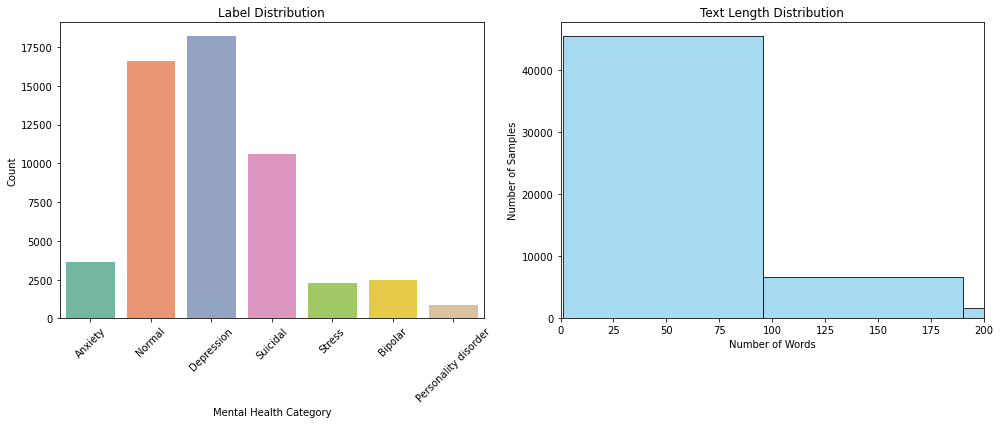

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# טען את הדאטה
df = pd.read_csv("final_data_.csv")

# הסרת ערכים חסרים (אם יש)
df = df.dropna(subset=['clean_text'])

# הוספת עמודת אורך טקסט
df['text_length'] = df['clean_text'].apply(lambda x: len(str(x).split()))

# יצירת גרפים
plt.figure(figsize=(14, 6))

# גרף התפלגות תוויות
plt.subplot(1, 2, 1)
sns.countplot(x='status', data=df, palette='Set2')
plt.title("Label Distribution")
plt.xticks(rotation=45)
plt.xlabel("Mental Health Category")
plt.ylabel("Count")

# גרף התפלגות אורך טקסט
plt.subplot(1, 2, 2)
sns.histplot(df['text_length'], bins=40, color='skyblue')
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Samples")
plt.xlim(0, 200)  # כדי לא להציג קצוות קיצוניים מדי

plt.tight_layout()
plt.show()


הקוד יוצר שתי ויזואליזציות שימושיות ל-EDA (חקירת הנתונים):

התפלגות התוויות (Label Distribution)
העמודות בגרף השמאלי מציגות כמה משפטים שייכים לכל קטגוריית רגש. כך אפשר לראות מיד האם הנתונים מאוזנים או שקיימים רגשות נדירים (למשל Suicidal או Bipolar). חוסר איזון משמעותי רומז שנצטרך טכניקות כמו oversampling או משקלי-קטגוריה באימון.

אורך הטקסט (Text Length Distribution)
ההיסטוגרמה הימנית מראה את מספר המילים בכל משפט (עד 200 מילים כדי להסתיר קצוות חריגים). רוב המשפטים כנראה קצרים—למשל סביב 10–30 מילים—מה שמאשר שה-max_length=128 שבחרנו לטוקניזציה מספיק בהחלט. אם היו הרבה משפטים ארוכים מחוץ לטווח 128-טוקנים, היינו צריכים לשקול להגדיל את הפרמטר הזה או לחתוך אחרת.





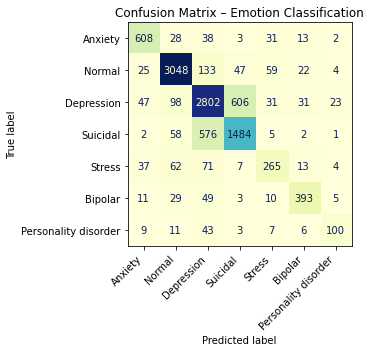

In [106]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ----- הפקת תחזיות על כל סט הבדיקה -----
batch_size = 32
texts       = test_df["clean_text"].astype(str).tolist()
labels_true = test_df["label"].tolist()

labels_pred = []
for i in range(0, len(texts), batch_size):
    enc = tokenizer(texts[i:i+batch_size],
                    padding=True, truncation=True,
                    max_length=128, return_tensors="pt")
    with torch.no_grad():
        preds = model(**enc).logits.argmax(dim=-1).tolist()
    labels_pred.extend(preds)

# ----- מטריצת בלבול -----
cm = confusion_matrix(labels_true, labels_pred,
                      labels=list(id2label.keys()))

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[id2label[i] for i in id2label.keys()]
)
disp.plot(ax=ax, cmap="YlGnBu", values_format="g", colorbar=False)

plt.title("Confusion Matrix – Emotion Classification")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


מטריצת הבלבול ממחישה איך מודל DistilBERT מבדיל בין שבעת הרגשות. התאים הכהים באלכסון (למשל **Normal**, **Depression**, **Suicidal**) מצביעים על כמות גדולה של תחזיות נכונות. התאים הבהירים מחוץ לאלכסון מסמנים היכן המודל מתבלבל: לדוגמה, 576 טקסטים אובדניים סווגו בטעות כ-Depression ו-133 טקסטים נייטרליים (Normal) כ-Depression – מה שמעיד שההפרדה בין שתי קטגוריות אלו היא הקשה ביותר. בסך-הכול, האלכסון הדומיננטי מאשר ביצועים טובים, בעוד הכיסים הבהירים מציעים שעל ידי תוספת נתונים או איזון קטגוריות ניתן לשפר עוד יותר את הדיוק.
